<a href="https://colab.research.google.com/github/CLASS-SZ/notebooks/blob/main/install_class_sz_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***IMPORTANT:*** Notebook needs updating since code has been re-factored in june 2024, we are working on it!

# Installation

Install class_sz, cosmopower, CMB and Pk emulators, and class_sz wrapper to cosmopower emulators.


This cell takes a few minutes.

In [ ]:
%%capture
!pwd
!sudo apt install libgsl-dev
!sudo apt install fftw3-dev
!rm -rf class_sz
!git clone https://github.com/CLASS-SZ/class_sz.git
%cd class_sz
!mv Makefile_linux Makefile
!make clean
!make -j


In [ ]:
%cd /content/

/content


In [ ]:
import os

def replace_line_in_file(file_path, old_line, new_line):
    # Check if file exists
    if not os.path.isfile(file_path):
        print(f"The file {file_path} does not exist.")
        return

    # Read the file contents
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Replace the specified line
    with open(file_path, 'w') as file:
        for line in lines:
            if line.strip() == old_line.strip():
                file.write(new_line + '\n')
            else:
                file.write(line)

# Path to the config.py file
file_path = 'class_sz/python/classy_szfast/classy_szfast/config.py'

# Lines to replace
old_line = "path_to_cosmopower_organization = ''"
new_line = "path_to_cosmopower_organization = 'cosmopower-organization/'"

# Perform the replacement
replace_line_in_file(file_path, old_line, new_line)

In [ ]:

import sys
sys.path.insert(1, "/content/class_sz/python")
sys.path.insert(1, "/content/class_sz/python/classy_szfast")

The import should not fail:

In [ ]:
import classy_sz

# Test calculations

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06

}

# a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

In [ ]:
%%time
M = Class()
M.set(cosmo_params)
M.set({
'output':'tCl,lCl,pCl',
'skip_background_and_thermo': 1,
'skip_pkl': 1,
'skip_pknl': 1,
})
M.compute_class_szfast()

CPU times: user 105 ms, sys: 126 ms, total: 231 ms
Wall time: 133 ms


In [ ]:
lensed_cls = M.lensed_cl()
l_fast = lensed_cls['ell']
cl_tt_fast = lensed_cls['tt']
cl_ee_fast = lensed_cls['ee']
cl_te_fast = lensed_cls['te']
cl_pp_fast = lensed_cls['pp']

In [ ]:
z_arr = np.array([0.38, 0.51, 0.61])
print(M.effective_f_sigma8(z_arr[0]))
print(M.Hubble(z_arr[0]))
print(M.angular_distance(z_arr[0]))

0.47289502797936894
0.0002770263513476551
1107.5085759576198


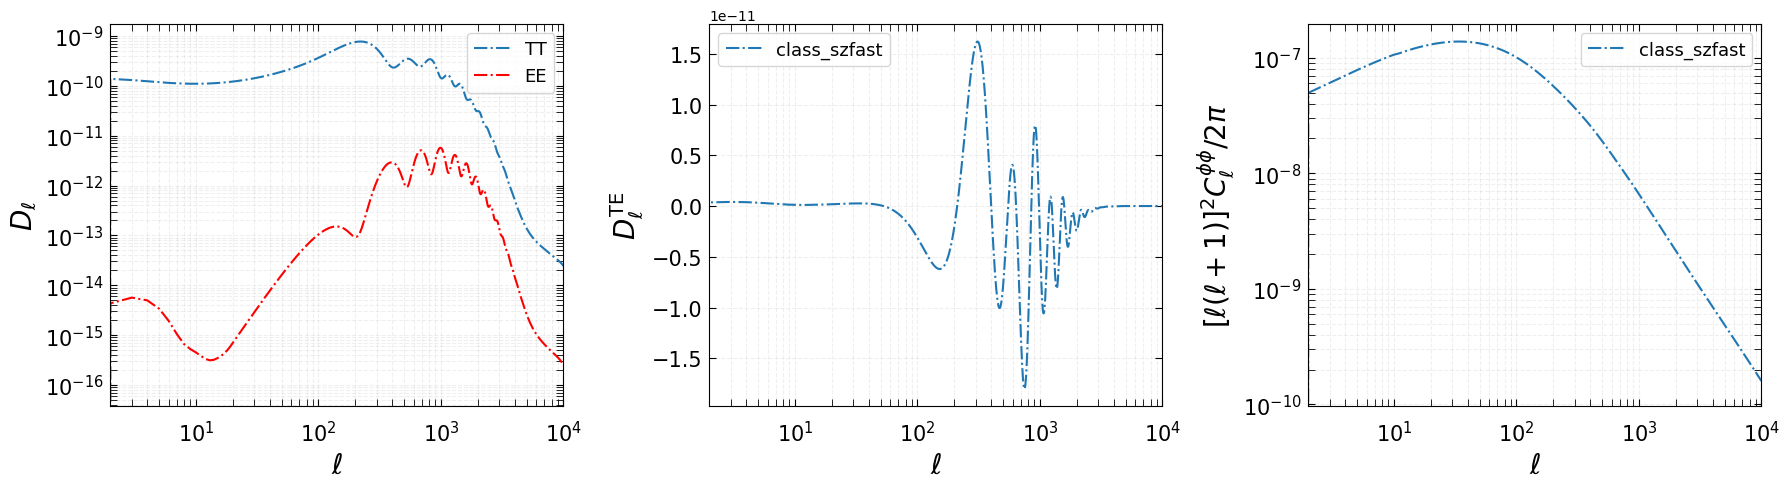

In [ ]:
label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')



ax.plot(l_fast,l_to_dl(l_fast)*cl_tt_fast,ls='-.',label='TT')



ax.plot(l_fast,l_to_dl(l_fast)*cl_ee_fast,ls='-.',c='red',label='EE')



ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(2e0,1e4)
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(l_fast,l_to_dl(l_fast)*cl_te_fast,ls='-.',label='class_szfast')


ax.set_ylabel(r"$D_\ell^\mathrm{TE}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim(2e0,1e4)
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(l_fast,l_to_dl(l_fast)*cl_pp_fast*(l_fast*(l_fast+1.)),ls='-.',label='class_szfast')

ax.set_ylabel(r"$[\ell(\ell+1)]^2 C_\ell^{\phi\phi}/2\pi$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(2e0,1e4)
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)
fig.tight_layout()

# P(k) calculation

In [ ]:
%%time
M = Class()
M.set(cosmo_params)
M.set({
'output':'mPk',
'skip_background_and_thermo': 1,
'skip_pkl': 0,
'skip_pknl': 1,
'ndim_redshifts': 50
})
M.compute_class_szfast()

CPU times: user 209 ms, sys: 181 ms, total: 390 ms
Wall time: 206 ms


In [ ]:
k = np.geomspace(1e-4,1e1)
zpk = 3.
get_pk = np.vectorize(M.pk_lin)
Pk_lin = get_pk(k,zpk)

[]

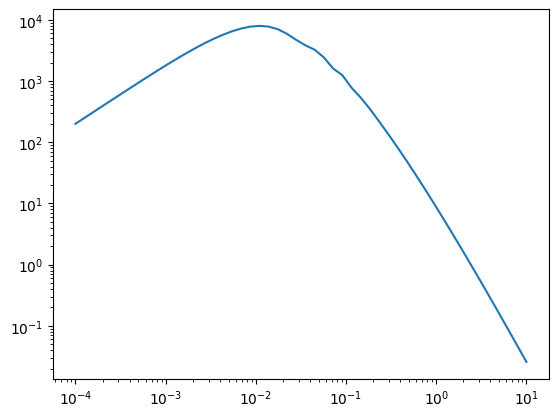

In [ ]:
plt.plot(k,Pk_lin)
plt.loglog()

In [ ]:
M.get_chi(zpk)

4400.706859349833

# Interactive P(k) plot -- credit: Paul Rogozenski

In [ ]:
import scipy
import pandas as pd


Nk_fid = 1000
k_fid = np.logspace(-4,1,Nk_fid)
k_table = np.array([10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2])

def compute_pk(H0, A_s, n_s, Omega_b, Omega_CDM, z):

    h = H0/100


    M = Class()
    new_cosmo_params = {
    'omega_b': Omega_b*h**2,
    'omega_cdm':  Omega_CDM*h**2,
    'H0': H0, # use H0 because this is what is used by the emulators.
    'tau_reio': 0.06, # not important for P(k)
    'ln10^{10}A_s': np.log(1e10*A_s),
    'n_s': n_s,

    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
    }
    M.set(new_cosmo_params)
    M.set({
    'output':'mPk',
    'skip_background_and_thermo': 1,
    'skip_pkl': 0,
    'skip_pknl': 1,
    'ndim_redshifts': 30
    })
    M.compute_class_szfast()
    get_pk = np.vectorize(M.pk_lin)
    Pk_lin = get_pk(k_fid,zpk)


    return Pk_lin, k_fid, M.get_chi(z)

H0_fid, A_s_fid, n_s_fid, Omega_b_fid, Omega_cdm_fid,  z_fid = 66.88,2.091e-9, 0.9626, 0.04945, 0.26962,  1.0

pk_fid, _,_ = compute_pk(H0_fid, A_s_fid, n_s_fid, Omega_b_fid, Omega_cdm_fid, z_fid)

def plot_pk(pk, k, z):
  plt.figure(figsize=(10,10))
  color_fid = 'royalblue'
  color_new = 'darkorange'
  plt.plot(k, pk, color=color_new , label='New Cosmology')
  plt.plot(k_fid, pk_fid, color=color_fid, label='Planck 2018 best-fit cosmology and massless neutrinos')

  fid_peaks = scipy.signal.find_peaks(pk_fid)[0]
  max_pk = max(np.max(pk), np.max(pk_fid))*4
  plt.vlines(k_fid[fid_peaks[0]], 0.1, max_pk,color=color_fid, ls='--', label='Planck 2018 Peak')
  peaks = scipy.signal.find_peaks(pk)[0]
  plt.vlines(k_fid[peaks[0]], 0.1, max_pk,color=color_new , ls='--', label='New Cosmology Peak')

  plt.xscale('log')
  plt.yscale('log')
  plt.xlim((10**-4, 10))
  plt.xlabel(r'$k \,\,\,\,[1/\mathrm{Mpc}]$')

  plt.ylabel(r'$P(k,z) \,\,\,\, [\mathrm{Mpc}]^{-3}$')
  plt.legend()
  plt.show()


def k_l_theta(comoving):
  rs = 2*np.pi/k_table
  thetas = rs/comoving
  ls = np.pi/thetas
  thetas *= (180/np.pi)*60
  my_array = np.array([k_table, ls, thetas, rs])
  my_array = my_array.T
  df = pd.DataFrame(my_array, columns = ['k [1/Mpc]','ell','theta [arcmin]', 'Rmin [Mpc]'])
  return df

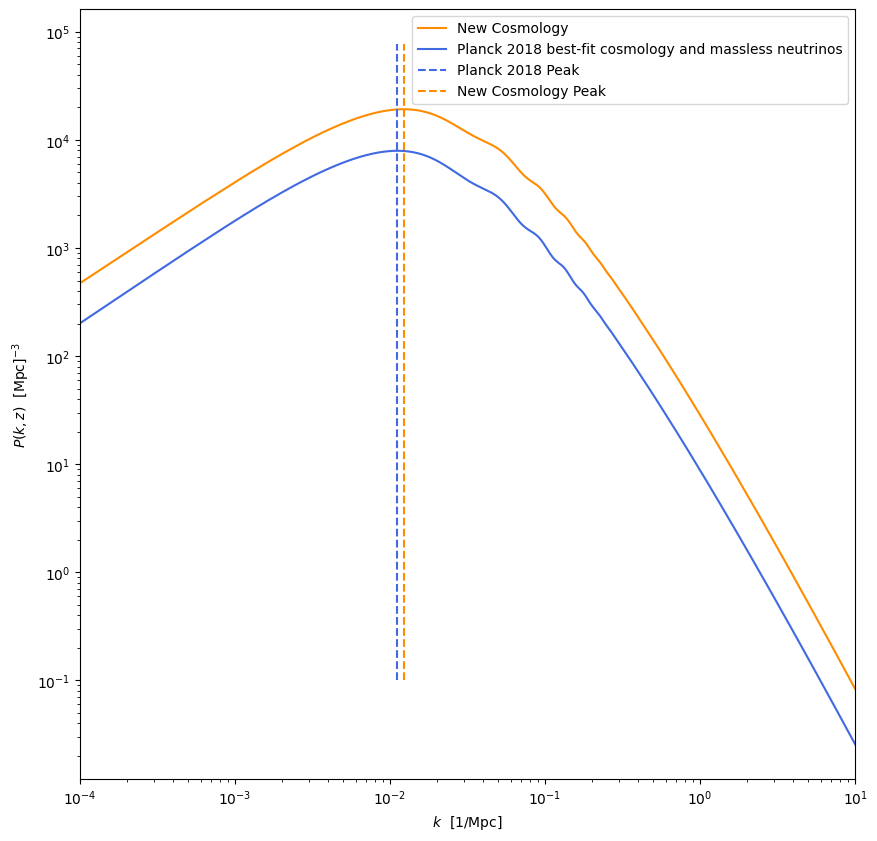

,k [1/Mpc],ell,theta [arcmin],Rmin [Mpc]
0,0.0001,0.157585,68534.326422,62831.853072
1,0.0010,1.575853,6853.432642,6283.185307
2,0.0100,15.758527,685.343264,628.318531
3,0.1000,157.585265,68.534326,62.831853
4,1.0000,1575.852651,6.853433,6.283185
5,10.0000,15758.526513,0.685343,0.628319
6,100.0000,157585.265133,0.068534,0.062832


In [ ]:
#@title Set Cosmology Parameters { run: "auto", vertical-output: true}
#@markdown Planck 2018 Best-Fit:

#@markdown $H_0$ = 66.88

#@markdown $A_s$ = 2.091e-9

#@markdown $n_s$ = 0.9626

#@markdown $\Omega_{b}$ = 0.04945

#@markdown $\Omega_{CDM}$ = 0.26962

#@markdown chosen $z$ = 1.0


H0 = 66.89 #@param {type:"slider", value:80, min:50, max:80, step:0.01}
A_s = 5.646e-9 #@param {type:"slider", min:1e-12, max:1e-8, step:1e-12}
n_s = 0.945 #@param {type:"slider", min:0.87, max:1.07, step:0.0001}
Omega_b = 0.04841 #@param {type:"slider", min:0.03, max:0.06, step:0.00001}
Omega_CDM = 0.31124 #@param {type:"slider", min:0.1, max:0.94, step:0.00001}
# m_nu = 0.06 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
z = 1.700001 #@param {type:"slider", min:0.000001, max:5.0, step:0.1}





Pk, k, comoving = compute_pk(H0, A_s, n_s, Omega_b, Omega_CDM, z)
plot_pk(Pk, k,z)
k_l_theta(comoving)
